K-Means Clustering

In [1]:
import pandas as pd

df = pd.read_csv("C://Users/user/Desktop/Machine Learning/archive/Mall_Customers.csv")
print(df.head())
print(df.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

Training the K-Means model

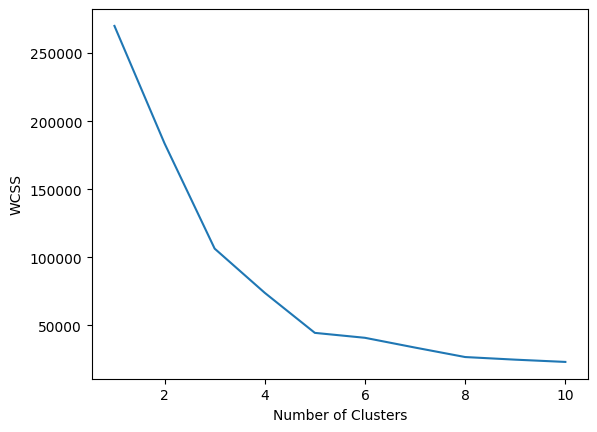

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

wcss = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


Final model training

In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


Output

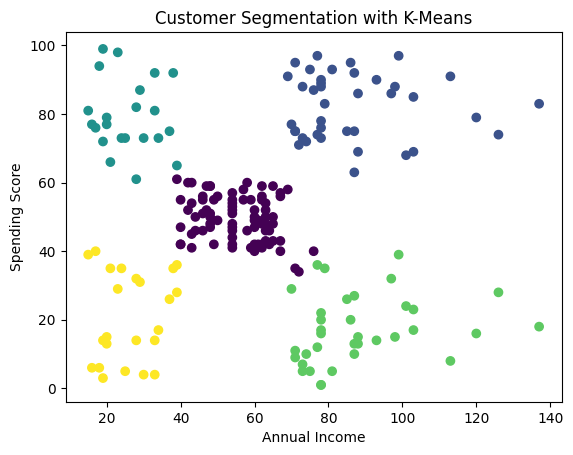

In [9]:
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=df['Cluster']  
)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation with K-Means")
plt.show()


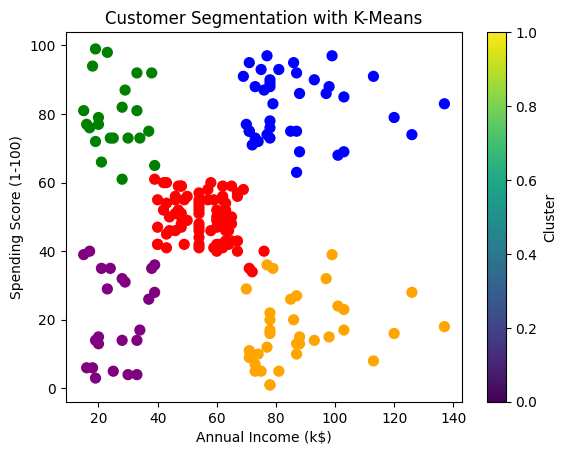

In [ ]:
plt.scatter(
    X.iloc[:, 0],
    X.iloc[:, 1],
    c=df['Cluster'].map({0:'red', 1:'blue', 2:'green', 3:'orange', 4:'purple'}),
    #cmap='Set1',  
    s=50          
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation with K-Means")
plt.colorbar(label='Cluster')
plt.show()


PCA (Principal Component Analysis)

Dataset

In [13]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)


(1797, 64)


PCA model training

Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)


Applying PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance:", pca.explained_variance_ratio_)


Explained Variance: [0.12033916 0.09561054]


Cumulative Variance: [0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943532 0.55941753 0.58873755 0.61655561 0.64232616
 0.66507919 0.68735099 0.70900328 0.72814495 0.74590042 0.76228111
 0.77824572 0.79313763 0.80661732 0.81933664 0.83099501 0.84157148
 0.85132464 0.86077023 0.86940036 0.87776679 0.88574372 0.89320844
 0.90046426 0.90738337 0.91392246 0.92033038 0.92624422 0.93195585
 0.93719222 0.94201029 0.94654748 0.95077911 0.95483964 0.95881049
 0.96237542 0.9657833  0.96906165 0.97217197 0.97505772 0.97782262
 0.98041436 0.98275919 0.98494176 0.98697774 0.98893286 0.99076605
 0.99244551 0.99405787 0.9955355  0.99688668 0.99813769 0.99917465
 1.         1.         1.         1.        ]
Number of components needed to retain 80.0% variance: 21


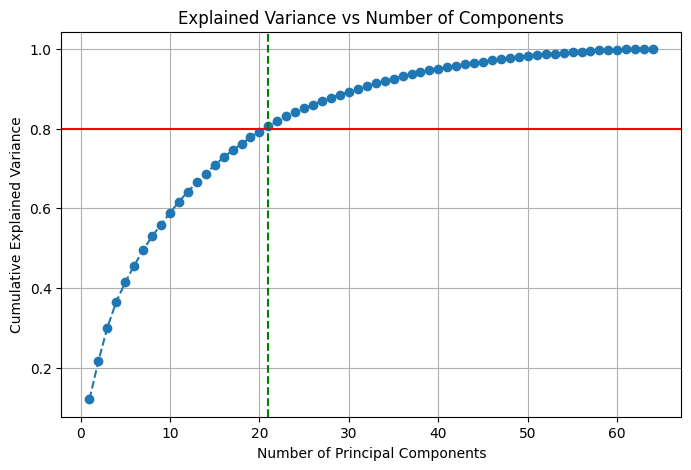

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# انجام PCA بدون محدودیت تعداد مؤلفه‌ها
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# محاسبه نسبت واریانس توضیح داده شده و جمع تجمعی آن
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# تعیین تعداد مؤلفه‌ها برای حفظ حداقل 80٪ واریانس
threshold = 0.8
n_components_needed = np.argmax(cumulative_variance >= threshold) + 1

print("Cumulative Variance:", cumulative_variance)
print(f"Number of components needed to retain {threshold*100}% variance:", n_components_needed)

# رسم نمودار واریانس تجمعی
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-')
plt.axvline(x=n_components_needed, color='g', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()


Output

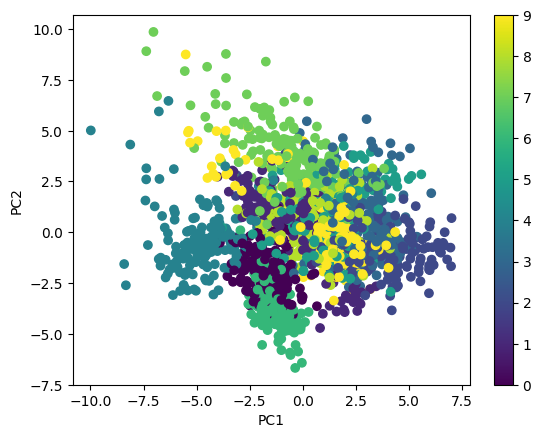

In [22]:
import matplotlib.pyplot as plt

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    cmap='viridis'
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()
